In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
from rich import print
from rich.table import Table

In [2]:
# load -> machine
# fetch -> internet
from sklearn.datasets import load_digits

In [3]:
resultat = load_digits()

In [5]:
print(resultat.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [6]:
resultat.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [8]:
resultat.data.shape

(1797, 64)

In [9]:
resultat.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
resultat.target.shape

(1797,)

In [11]:
X, y = resultat.data, resultat.target

In [12]:
image1 = X[0].reshape((8, 8))

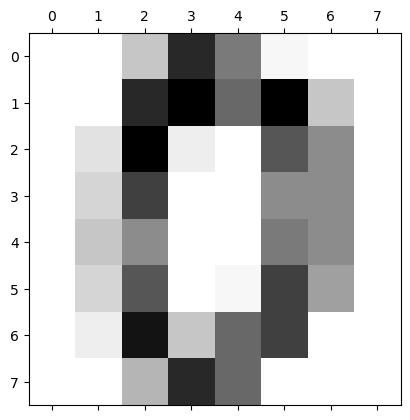

In [15]:
plt.matshow(image1, cmap="Greys")

In [17]:
y[0]

0

**EXERCICE** 
Assembler les 16 premières images en une figure de 4x4 repères

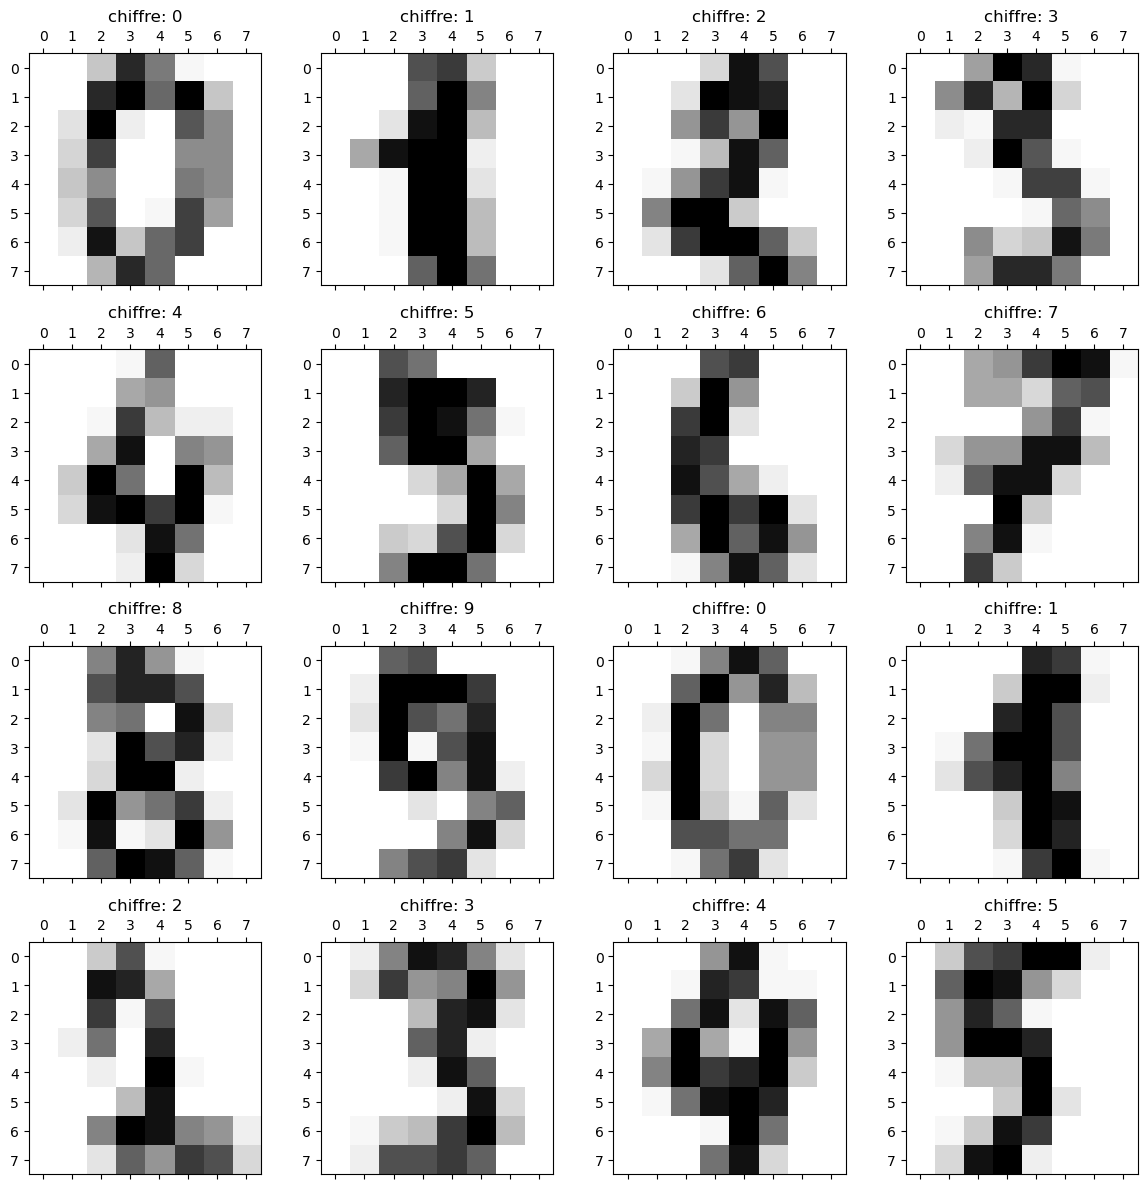

In [21]:
fig, reps = plt.subplots(ncols=4, nrows=4, figsize=(12, 12), tight_layout=True)

for i, rep in enumerate(reps.ravel()):
    rep.matshow(X[i].reshape((8,8)), cmap="Greys")
    rep.set_title(f"chiffre: {y[i]}")

**OBJECTIF** :

1. Faire un train test split
2. Faire une régression logistique

In [22]:
from sklearn.model_selection import train_test_split, cross_validate

In [23]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y)

In [32]:
lr = LogisticRegression()
lr.fit(X_tr, y_tr)

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
lr = LogisticRegression(max_iter=10_000)
lr.fit(X_tr, y_tr)

LogisticRegression(max_iter=10000)

In [34]:
lr.score(X_tr, y_tr)

1.0

In [35]:
lr.score(X_te, y_te)

0.9511111111111111

In [ ]:
lr.

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
confusion_matrix(y_tr, lr.predict(X_tr))

array([[125,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 134,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 136,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 146,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 134,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 136,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 146,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 132,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 120,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 138]])

In [38]:
confusion_matrix(y_te, lr.predict(X_te))

array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 47,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2, 34,  0,  0,  0,  0,  0,  1],
       [ 0,  1,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 41,  1,  1,  1,  1],
       [ 0,  1,  0,  0,  0,  0, 33,  0,  1,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 46,  0,  0],
       [ 0,  1,  2,  2,  0,  1,  2,  0, 45,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 42]])

**EXERCICE** 

1. Comparer avec un classificateur par plus proche voisin. 
2. Faite une procédure de validation croisée pour sélectionner le meilleur modèle entre `LogisticRegression` avec `C` pour hyperparamètre et `KNeighborsClassifier` d'hyperparamètre `n_neighboors`.

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
estimateurs = list()

In [42]:
for C in range(1, 8):
    estimateurs.append(LogisticRegression(C=C, max_iter=10_000))
    
for nombre_voisin in range(3, 10):
    estimateurs.append(KNeighborsClassifier(n_neighbors=nombre_voisin))

In [43]:
%%time
resultat_cv = [
    (estimateur, cross_validate(estimateur, X_tr, y_tr)) 
    for estimateur in estimateurs
]

CPU times: user 59.4 s, sys: 170 ms, total: 59.5 s
Wall time: 58.7 s


In [44]:
resultat_cv

[(LogisticRegression(C=1, max_iter=10000),
  {'fit_time': array([1.12914634, 1.05975699, 2.05252814, 1.05016804, 1.39092278]),
   'score_time': array([0.00049853, 0.00043607, 0.00038719, 0.00039291, 0.00042295]),
   'test_score': array([0.95555556, 0.95925926, 0.97026022, 0.96654275, 0.95539033])}),
 (LogisticRegression(C=2, max_iter=10000),
  {'fit_time': array([2.24199104, 1.28353   , 1.38654923, 1.65762901, 1.6001637 ]),
   'score_time': array([0.00042081, 0.00045896, 0.00038242, 0.00042367, 0.00042152]),
   'test_score': array([0.95185185, 0.95925926, 0.97026022, 0.96282528, 0.95539033])}),
 (LogisticRegression(C=3, max_iter=10000),
  {'fit_time': array([1.71942449, 1.03673482, 1.6370039 , 1.39809537, 1.38558197]),
   'score_time': array([0.0004251 , 0.00041676, 0.0003767 , 0.0004065 , 0.00041342]),
   'test_score': array([0.95185185, 0.95925926, 0.97026022, 0.95910781, 0.95539033])}),
 (LogisticRegression(C=4, max_iter=10000),
  {'fit_time': array([1.20644617, 1.68191147, 2.957292

In [47]:
tableau = Table(
    "Modèle",  
    "score moyen", 
    "variance scores", 
    title="Résultats Validation Croisée"
)

for modele, cv_score in resultat_cv:
    tableau.add_row(
        repr(modele),
        repr(cv_score["test_score"].mean()),
        repr(cv_score["test_score"].std()),
    )

In [48]:
print(tableau)

                             Résultats Validation Croisée                              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Modèle                                  ┃ score moyen        ┃ variance scores      ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ LogisticRegression(C=1, max_iter=10000) │ 0.9614016246730002 │ 0.005996795923218944 │
│ LogisticRegression(C=2, max_iter=10000) │ 0.9599173895084675 │ 0.006346814718174013 │
│ LogisticRegression(C=3, max_iter=10000) │ 0.9591738950846758 │ 0.006178122201581468 │
│ LogisticRegression(C=4, max_iter=10000) │ 0.9584331543439351 │ 0.006343304806945582 │
│ LogisticRegression(C=5, max_iter=10000) │ 0.9591738950846758 │ 0.006178122201581468 │
│ LogisticRegression(C=6, max_iter=10000) │ 0.9584304006608839 │ 0.00678280488118957  │
│ LogisticRegression(C=7, max_iter=10000) │ 0.9569489191794023 │ 0.007603728210397254 │
│ KNeighborsClassifier(n_neighbors=3)     │ 0.9873908853091009 │ 0.008638003076838834 │
│ KNeighborsClassifier(n_neighbors=4)     │ 0.9792234613795952 │ 0.009254358146545216 │
│ KNeighborsClassifier()                  │ 0.9799614484372849 │ 0.005012683489292769 │
│ KNeighborsClassifier(n_neighbors=6)     │ 0.9777337188489605 │ 0.005734338506574387 │
│ KNeighborsClassifier(n_neighbors=7)     │ 0.9792179540134931 │ 0.00375826391402537  │
│ KNeighborsClassifier(n_neighbors=8)     │ 0.9777364725320116 │ 0.006182763555086837 │
│ KNeighborsClassifier(n_neighbors=9)     │ 0.9777364725320116 │ 0.005212570000865164 │
└─────────────────────────────────────────┴────────────────────┴──────────────────────┘

In [49]:
meilleur = KNeighborsClassifier(n_neighbors=3)

In [50]:
meilleur.fit(X_tr, y_tr)

KNeighborsClassifier(n_neighbors=3)

In [51]:
meilleur.score(X_tr, y_tr)

0.9933184855233853

In [52]:
meilleur.score(X_te, y_te)

0.9911111111111112

## Reprise de l'ancien exemple de régression

In [53]:
L = 5.

def reelle(xs):
    return np.sin(10 * np.pi * xs / L) / (1 + np.exp(3 * xs / L))

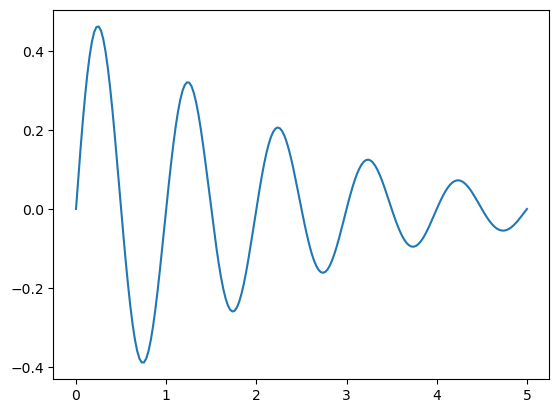

In [54]:
xs = np.linspace(0, L, 200)
ys = reelle(xs)

plt.plot(xs, ys)

In [57]:
N = 100
epsilon = 0.1

X = np.random.uniform(low=0., high=L, size=(N, 1))

vraies = reelle(X).reshape(N)
y = vraies + epsilon * np.random.randn(N)

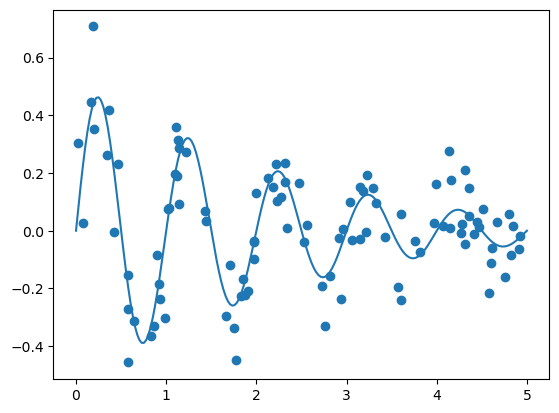

In [58]:
xs = np.linspace(0, L, 200)
ys = reelle(xs)

plt.plot(xs, ys)
plt.scatter(X.ravel(), y)

**EXERCICE** Comparer en validation croisée:

1. Le modèle polynomial.
2. Un réseau de neurones à une couche.
3. Un autre modèle de régression de votre choix.

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

In [60]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y)

In [62]:
estimateurs = list()

In [63]:
for degre in range(1, 20):
    estimateurs.append(
        Pipeline(
            [
                ("genere_puissance", PolynomialFeatures(degree=degre)),
                ("regression_linéaire", LinearRegression()),
            ]
        )
    )

In [64]:
for nombre_neurones in range(2, 10):
    estimateurs.append(MLPRegressor(hidden_layer_sizes=(nombre_neurones, )))

In [65]:
%%time
resultat_cv = [
    (estimateur, cross_validate(estimateur, X_tr, y_tr)) 
    for estimateur in estimateurs
]

/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Opti

CPU times: user 676 ms, sys: 3.94 ms, total: 680 ms
Wall time: 699 ms


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Opti

In [69]:
tableau = Table(
    "Modèle",  
    "score moyen", 
    "variance scores",
    title="Résultats Validation Croisée"
)

for modele, cv_score in resultat_cv:
    tableau.add_row(
        repr(modele),
        repr(cv_score["test_score"].mean()),
        repr(cv_score["test_score"].std()),
    )

In [70]:
print(tableau)

                                           Résultats Validation Croisée                                            
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ Modèle                                                            ┃ score moyen           ┃ variance scores     ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ Pipeline(steps=[('genere_puissance',                              │ -0.043942084465358036 │ 0.06328599886940674 │
│ PolynomialFeatures(degree=1)),                                    │                       │                     │
│                 ('regression_linéaire', LinearRegression())])     │                       │                     │
│ Pipeline(steps=[('genere_puissance', PolynomialFeatures()),       │ -0.037884001030288085 │ 0.15999183832821992 │
│                 ('regression_linéaire', LinearRegression())])     │                       │                     │
│ Pipeline(steps=[('genere_puissance',                              │ 0.021448833533461786  │ 0.20800465849855002 │
│ PolynomialFeatures(degree=3)),                                    │                       │                     │
│                 ('regression_linéaire', LinearRegression())])     │                       │                     │
│ Pipeline(steps=[('genere_puissance',                              │ -0.014104270389068963 │ 0.17850031428041896 │
│ PolynomialFeatures(degree=4)),                                    │                       │                     │
│                 ('regression_linéaire', LinearRegression())])     │                       │                     │
│ Pipeline(steps=[('genere_puissance',                              │ -0.1976657545728933   │ 0.2823465307163052  │
│ PolynomialFeatures(degree=5)),                                    │                       │                     │
│                 ('regression_linéaire', LinearRegression())])     │                       │                     │
│ Pipeline(steps=[('genere_puissance',                              │ -0.7262082328573599   │ 1.2854649668418336  │
│ PolynomialFeatures(degree=6)),                                    │                       │                     │
│                 ('regression_linéaire', LinearRegression())])     │                       │                     │
│ Pipeline(steps=[('genere_puissance',                              │ -1.3616604330064286   │ 2.5648198971031326  │
│ PolynomialFeatures(degree=7)),                                    │                       │                     │
│                 ('regression_linéaire', LinearRegression())])     │                       │                     │
│ Pipeline(steps=[('genere_puissance',                              │ -3.1210172904082967   │ 6.067376326260491   │
│ PolynomialFeatures(degree=8)),                                    │                       │                     │
│                 ('regression_linéaire', LinearRegression())])     │                       │                     │
│ Pipeline(steps=[('genere_puissance',                              │ -1.7039831797863172   │ 3.4140010419950984  │
│ PolynomialFeatures(degree=9)),                                    │                       │                     │
│                 ('regression_linéaire', LinearRegression())])     │                       │                     │
│ Pipeline(steps=[('genere_puissance',                              │ 0.027999434254248733  │ 0.23960575661227812 │
│ PolynomialFeatures(degree=10)),                                   │                       │                     │
│                 ('regression_linéaire', LinearRegression())])     │                       │                     │
│ Pipeline(steps=[('genere_puissance',                              │ -6.341591739418567    │ 12.858720282089473  │
│ PolynomialFeatures(degree=11)),                       

**REMARQUE**

- Le score est croissant (plus grand = meilleur)
- Le score maximal est 1.
- Le score 0 correspond au prédicteur constant donnant la valeur moyenne de l'échantillon d'entrainement.

**EXERCICE** Ajouter `MinMaxScaler` en première étape du pipeline pour voir si le problème vient de là. Si il reste des problèmes de convergence, ajuster les paramètres pertinents.

In [75]:
estimateurs = list()

for degre in range(1, 20):
    estimateurs.append(
        Pipeline(
            [
                ("rescaling", MinMaxScaler()),
                ("genere_puissance", PolynomialFeatures(degree=degre)),
                ("regression_linéaire", LinearRegression()),
            ]
        )
    )
    
for nombre_neurones in range(2, 10):
    estimateurs.append(
        Pipeline(
            [
                ("rescaling", MinMaxScaler()),
                (
                    "reseau_neurones", 
                    MLPRegressor(
                        hidden_layer_sizes=(nombre_neurones,),
                        max_iter=10_000,
                    )
                )
            ]
        )
    )


In [76]:
%%time
resultat_cv = [
    (estimateur, cross_validate(estimateur, X_tr, y_tr)) 
    for estimateur in estimateurs
]

CPU times: user 1.3 s, sys: 1 µs, total: 1.3 s
Wall time: 1.3 s


In [77]:
tableau = Table(
    "Modèle",  
    "score moyen", 
    "variance scores",
    title="Résultats Validation Croisée"
)

for modele, cv_score in resultat_cv:
    tableau.add_row(
        repr(modele),
        repr(cv_score["test_score"].mean()),
        repr(cv_score["test_score"].std()),
    )

In [78]:
print(tableau)

                                           Résultats Validation Croisée                                            
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ Modèle                                                            ┃ score moyen           ┃ variance scores     ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ Pipeline(steps=[('rescaling', MinMaxScaler()),                    │ -0.04394208446535812  │ 0.06328599886940675 │
│                 ('genere_puissance',                              │                       │                     │
│ PolynomialFeatures(degree=1)),                                    │                       │                     │
│                 ('regression_linéaire', LinearRegression())])     │                       │                     │
│ Pipeline(steps=[('rescaling', MinMaxScaler()),                    │ -0.037884001030287974 │ 0.15999183832821962 │
│                 ('genere_puissance', PolynomialFeatures()),       │                       │                     │
│                 ('regression_linéaire', LinearRegression())])     │                       │                     │
│ Pipeline(steps=[('rescaling', MinMaxScaler()),                    │ 0.021448833533463295  │ 0.2080046584985519  │
│                 ('genere_puissance',                              │                       │                     │
│ PolynomialFeatures(degree=3)),                                    │                       │                     │
│                 ('regression_linéaire', LinearRegression())])     │                       │                     │
│ Pipeline(steps=[('rescaling', MinMaxScaler()),                    │ -0.014104270389062656 │ 0.1785003142804421  │
│                 ('genere_puissance',                              │                       │                     │
│ PolynomialFeatures(degree=4)),                                    │                       │                     │
│                 ('regression_linéaire', LinearRegression())])     │                       │                     │
│ Pipeline(steps=[('rescaling', MinMaxScaler()),                    │ -0.19766575457338725  │ 0.28234653071738725 │
│                 ('genere_puissance',                              │                       │                     │
│ PolynomialFeatures(degree=5)),                                    │                       │                     │
│                 ('regression_linéaire', LinearRegression())])     │                       │                     │
│ Pipeline(steps=[('rescaling', MinMaxScaler()),                    │ -0.7262082328621041   │ 1.2854649668512017  │
│                 ('genere_puissance',                              │                       │                     │
│ PolynomialFeatures(degree=6)),                                    │                       │                     │
│                 ('regression_linéaire', LinearRegression())])     │                       │                     │
│ Pipeline(steps=[('rescaling', MinMaxScaler()),                    │ -1.3616604331279034   │ 2.564819897343123   │
│                 ('genere_puissance',                              │                       │                     │
│ PolynomialFeatures(degree=7)),                                    │                       │                     │
│                 ('regression_linéaire', LinearRegression())])     │                       │                     │
│ Pipeline(steps=[('rescaling', MinMaxScaler()),                    │ -3.1210172913637693   │ 6.067376328163324   │
│                 ('genere_puissance',                              │                       │                     │
│ PolynomialFeatures(degree=8)),                                    │                       │                     │
│                 ('regression_linéaire', LinearRegressi

**EXERCICE** Aller regarder la documentation de scikit-learn pour voir ce qui est perfectible.